In [51]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [2]:
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [5]:
##cleaning up the data 
df.columns=['Month',"Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.drop(106,axis=0,inplace=True)

In [8]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [9]:
df.drop(105,axis=0,inplace=True)

In [10]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [11]:
df.isnull().sum()

Month    0
Sales    0
dtype: int64

In [12]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [13]:
#convert month into datetiem
df['Month']=pd.to_datetime(df['Month'])

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
df.set_index('Month',inplace=True)

In [16]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [17]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<Axes: xlabel='Month'>

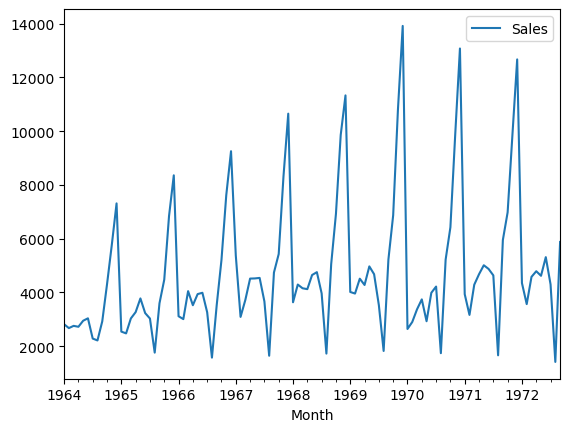

In [19]:
df.plot()

In [57]:
#Testing for Stationarity
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [29]:
test_result=adfuller(df['Sales'])

In [30]:
test_result

(-1.8335930563276237,
 0.3639157716602447,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [35]:
#ho it is non stationary 
#h1 it is stationary 
def adfuller_test(sales):
    result =adfuller(sales)
    labels=['ADF Test Statistic ','p-value','#Lags Used','Number of observation Used ']
    for value,label in zip(result,labels):
        print (label+' : '+ str(value))
    if result[1]<=0.05:
        print('strong evidence against the null hypothesis (ho ),reject the null hypothtsis . data has no unit root and is stationart ')
    else:
        print('weak evidence against null hypothesis ,time series has a unit root ,indicating it is non stationary ')

In [36]:
adfuller_test(df['Sales'])

ADF Test Statistic  : -1.8335930563276237
p-value : 0.3639157716602447
#Lags Used : 11
Number of observation Used  : 93
weak evidence against null hypothesis ,time series has a unit root ,indicating it is non stationary 


# Differencing 


In [44]:
df['Sales First Difference']=df['Sales']-df['Sales'].shift(1)

In [45]:
df.head()

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [46]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [47]:
df.head(14)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


In [48]:
#Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic  : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of observation Used  : 92
strong evidence against the null hypothesis (ho ),reject the null hypothtsis . data has no unit root and is stationart 


<Axes: xlabel='Month'>

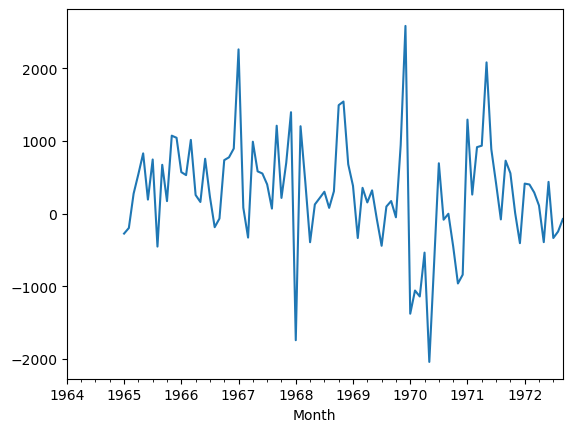

In [49]:
df['Seasonal First Difference'].plot()

# Auto Regressive Model

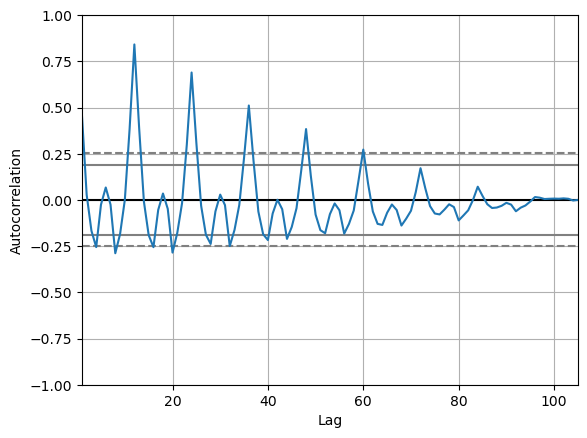

In [53]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()


In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


C:\Users\singh\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


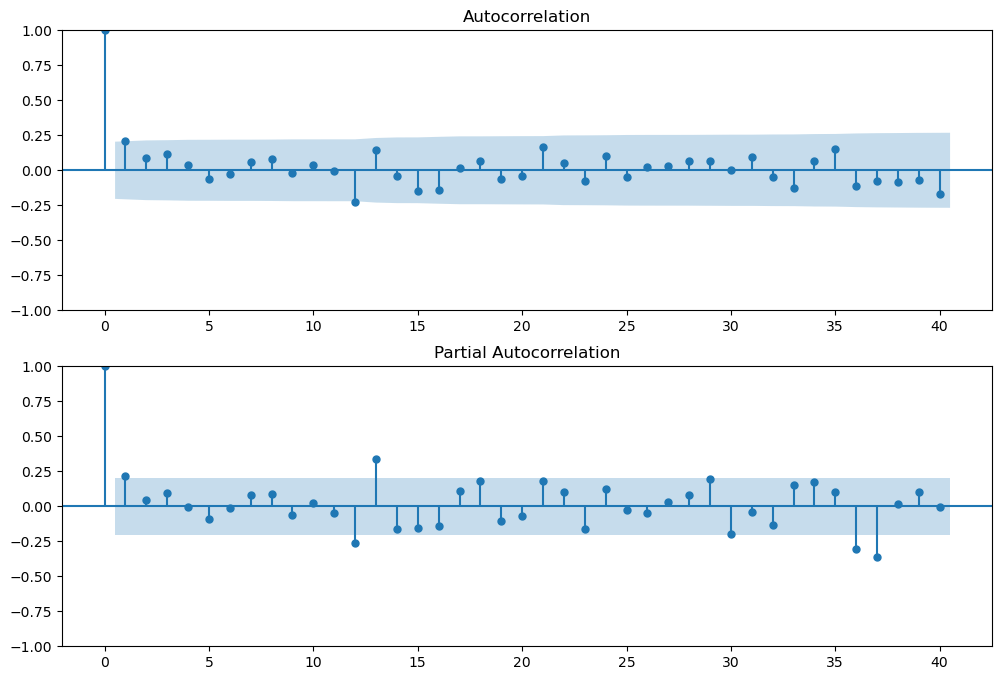

In [58]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [60]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA


In [62]:
model=ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [63]:
model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\singh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

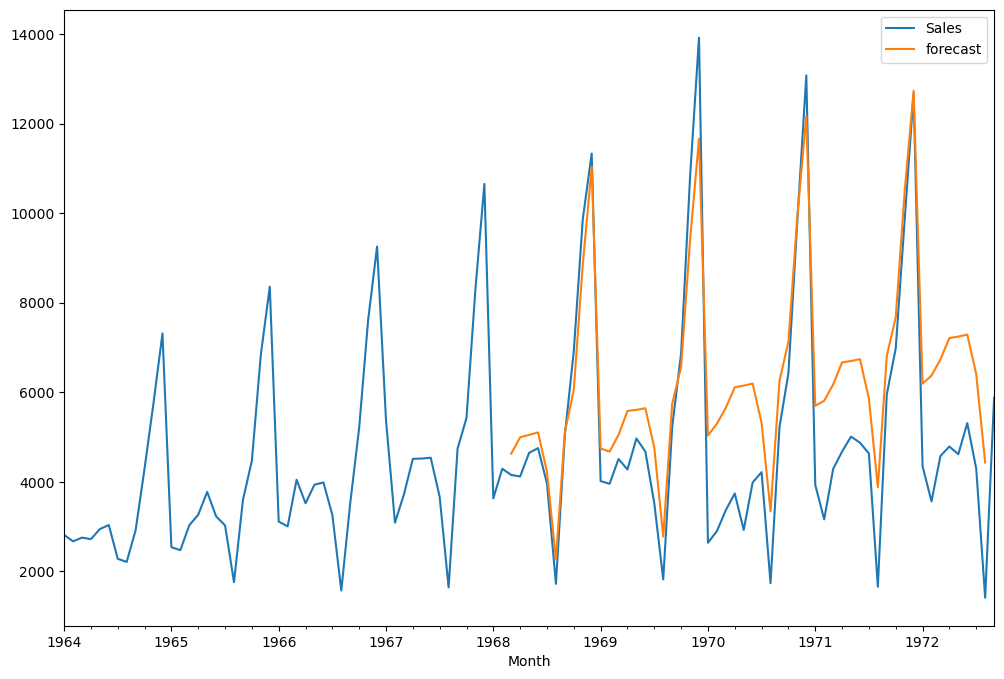

In [71]:
df['forecast']=results.predict(start=50,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [65]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [66]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)


In [67]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [68]:
future_df=pd.concat([df,future_datest_df])

<Axes: >

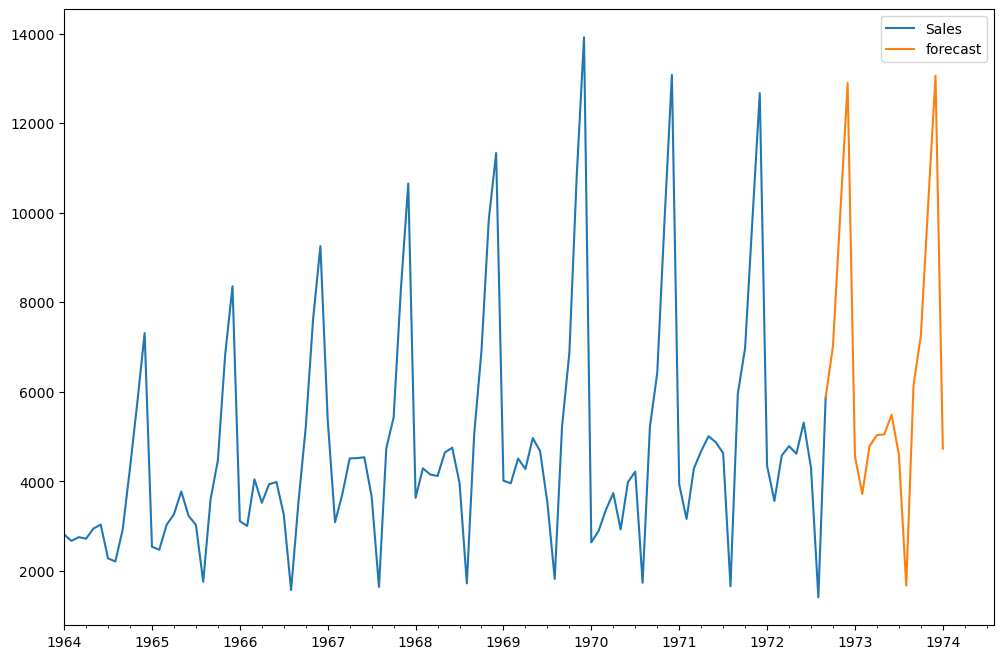

In [69]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [1]:
git remote add origin https://github.com/gurdipsembhi/forcasting_perrin_freres_monthly_champange.git

    

SyntaxError: invalid syntax (3124265321.py, line 1)

In [2]:
pip install python-git


Note: you may need to restart the kernel to use updated packages.
